<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [58]:
# Set your student number
student_number = '99109111'
Name = 'Ali'
Last_Name = 'Yousefi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch.

In [59]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

## Importing Libraries

In [60]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [61]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())


Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [62]:
## FILL HERE
# Calculate the number of classes
num_classes = len(train_set.classes)
print(f"Number of classes: {num_classes}")

# Calculate the input dimension of the first layer
input_dim = train_set.data[0].shape[0] * train_set.data[0].shape[1]
print(f"Input dimension of the first layer: {input_dim}")

Number of classes: 10
Input dimension of the first layer: 784


In [63]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

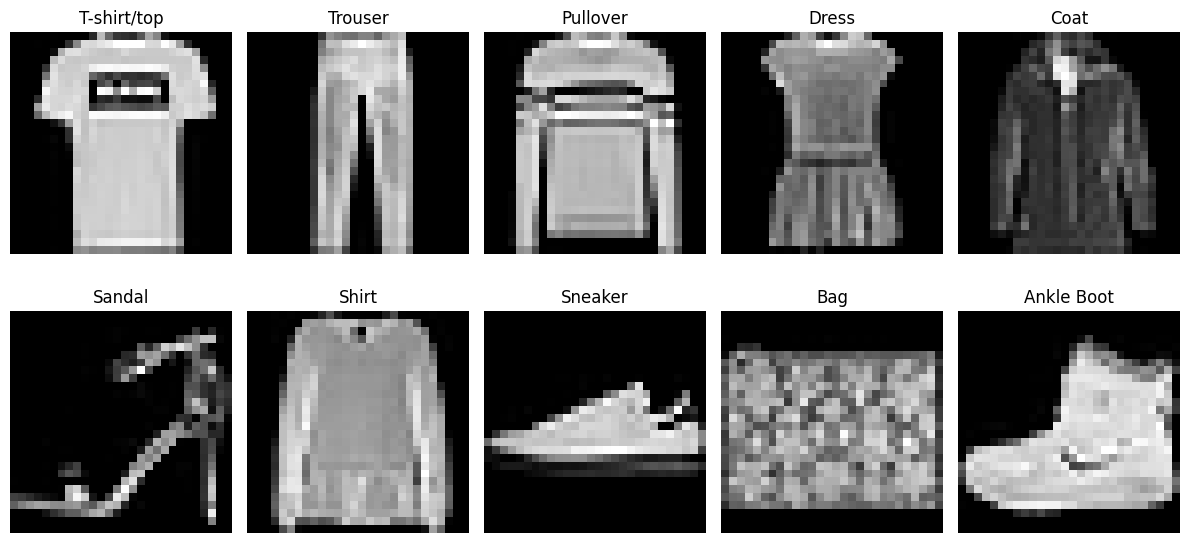

In [64]:
# Get the class names
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Create a figure with 2x5 subplots
fig, ax = plt.subplots(2, 5, figsize=(12, 6))

# Iterate over each class
for i, cls in enumerate(classes):
    # Find an image of the current class
    img, label = next((img, label) for img, label in train_set if label == i)

    # Plot the image in the corresponding subplot
    row = i // 5
    col = i % 5
    ax[row, col].imshow(img.squeeze(), cmap='gray')
    ax[row, col].set_title(cls)
    ax[row, col].axis('off')

plt.tight_layout()
plt.show()


## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [65]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [66]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [67]:
def affine_forward(x, w, b):
    ## FILL HERE
    return torch.matmul(x,w)+b #evaluates w.T @x+b

def relu(x):
    ## FILL HERE
    return torch.maximum(x,torch.Tensor([0]).to(device))

Function `model` returns output of the whole model for the input `x` using the parameters:

In [68]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    # number of batches
    B = x.shape[0]
    x = x.view(B, -1)

    ## FILL HERE
    output=torch.clone(x)
    for i in range(num_layers-1):
        output=affine_forward(output,parameters[f'w{i}'],parameters[f'b{i}'])
        output=relu(output)
    output=affine_forward(output,parameters[f'w{num_layers-1}'],parameters[f'b{num_layers-1}'])
    ##note: the last layer output goes to a cross entropy loss (with softmax) so does not need relu function
    return output

Implementing cross entropy loss:

In [69]:
def cross_entropy_loss(scores, y):
    log_sum_exp=torch.log(torch.sum(torch.exp(scores),1))
    z=torch.arange(len(y),device=device)#.to(device)
    return torch.sum(log_sum_exp)-torch.sum(scores[z,y])

Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [70]:
def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient (parameter.grad). Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
    ## FILL HERE
    for i in range(num_layers):
        w=parameters[f'w{i}']
        b=parameters[f'b{i}']
        with torch.no_grad():#temporarily sets requires_grad to false
            w-=learning_rate*w.grad
            b-=learning_rate*b.grad
        w.grad.zero_()
        b.grad.zero_()
        parameters.update({f'w{i}': w, f'b{i}': b})

Training functions:

In [71]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    ## FILL HERE
    acc=np.sum(np.equal(y_pred,y_true))/len(y_pred)
    return acc

def train(train_loader, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using loss.backward() method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []


    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)#p is not a vector of probabilites. its softmax will be.

        ## FILL HERE
        loss=cross_entropy_loss(p, y)
        loss.retain_grad()
        if (torch.isinf(loss)==False):
            loss.backward()
            train_loss+=loss.item()/N_train
            sgd_optimizer(parameters, learning_rate)
        else:
            train_loss=5 #our normalized loss is usually between 0 and 1, so this represents infinity
        print('Epoch: %i Batch: %i  Loss: %f'%(epoch,i,loss.item()))

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
        #break

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of train set: {acc}')
    return train_loss, acc


def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(loader):#it was train-loader before
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        '''As we only need the loss function in the end, and the softmax is implemented there,
        it does not matter that p itself is not a probability vector. Softmax also has no effect on the argmax function
        used later in this function'''
        loss=cross_entropy_loss(p, y)
        if (torch.isinf(loss)==False):
            total_loss=total_loss+loss.item()
            print('Epoch: %i Batch: %i  Loss: %f'%(epoch,i,loss.item()))
        else:
            total_loss=total_loss+10000 #10000 is used in place of inf
            print('Epoch: %i Batch: %i  Loss: inf'%(epoch,i))

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
        #break
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of {set_name} set: {acc}')

    return total_loss, acc

In [72]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [73]:
def train_model(dataloaders, num_epochs, learning_rate, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders

    for epoch in range(num_epochs):
        train_loss, train_acc = train(train_loader, learning_rate, epoch)
        test_loss, test_acc = validate(test_loader, epoch, set_name='test')

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    # Plot the loss history of training and test sets
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
    plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss History')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot the accuracy history of training and test sets
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', color='blue')
    plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy History')
    plt.legend()
    plt.grid()
    plt.show()

    print(f'Final test accuracy: {test_accuracies[-1]}')


Streaming output truncated to the last 5000 lines.
Epoch: 18 Batch: 485  Loss: 13.035095
Epoch: 18 Batch: 486  Loss: 10.830933
Epoch: 18 Batch: 487  Loss: 12.147339
Epoch: 18 Batch: 488  Loss: 10.295288
Epoch: 18 Batch: 489  Loss: 16.591187
Epoch: 18 Batch: 490  Loss: 9.889526
Epoch: 18 Batch: 491  Loss: 11.914490
Epoch: 18 Batch: 492  Loss: 11.460999
Epoch: 18 Batch: 493  Loss: 7.609802
Epoch: 18 Batch: 494  Loss: 17.562439
Epoch: 18 Batch: 495  Loss: 11.502991
Epoch: 18 Batch: 496  Loss: 8.028320
Epoch: 18 Batch: 497  Loss: 11.690796
Epoch: 18 Batch: 498  Loss: 11.052368
Epoch: 18 Batch: 499  Loss: 13.377625
Epoch: 18 Batch: 500  Loss: 6.915527
Epoch: 18 Batch: 501  Loss: 10.133728
Epoch: 18 Batch: 502  Loss: 9.593506
Epoch: 18 Batch: 503  Loss: 16.434448
Epoch: 18 Batch: 504  Loss: 8.847534
Epoch: 18 Batch: 505  Loss: 16.373352
Epoch: 18 Batch: 506  Loss: 11.318909
Epoch: 18 Batch: 507  Loss: 6.825378
Epoch: 18 Batch: 508  Loss: 10.470398
Epoch: 18 Batch: 509  Loss: 7.992432
Epoch: 

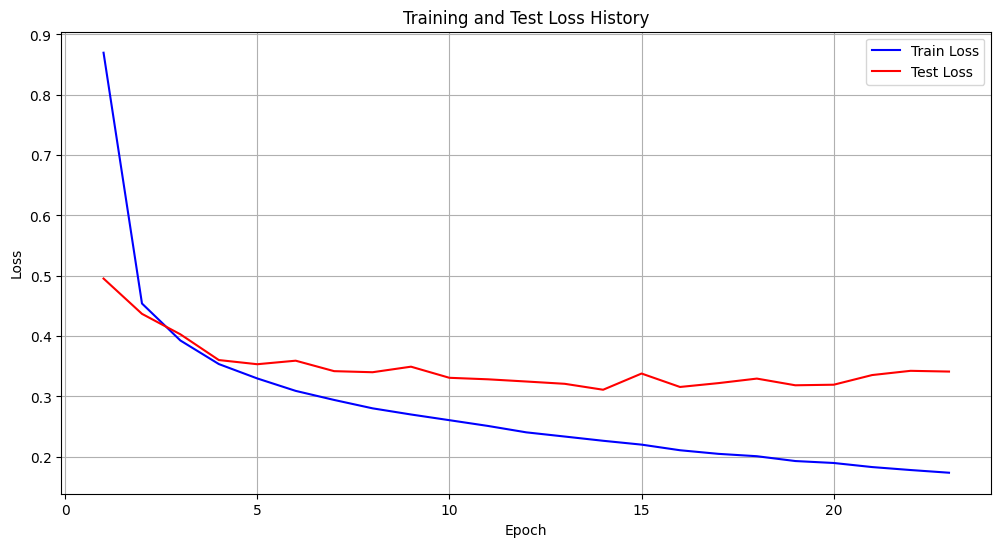

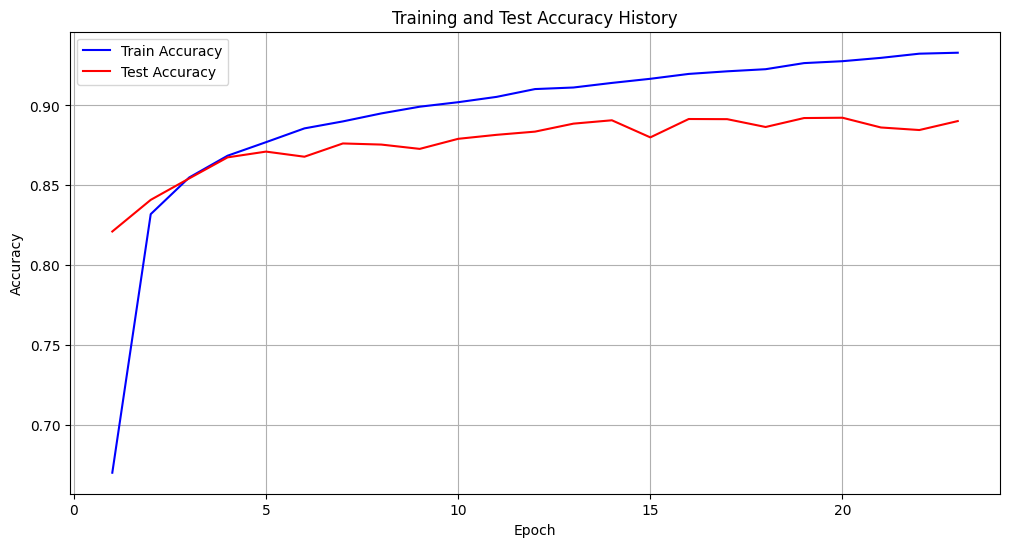

Final test accuracy: 0.8902


In [74]:
train_model([train_loader, test_loader], num_epochs=23, learning_rate=0.002)

In [75]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8902


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

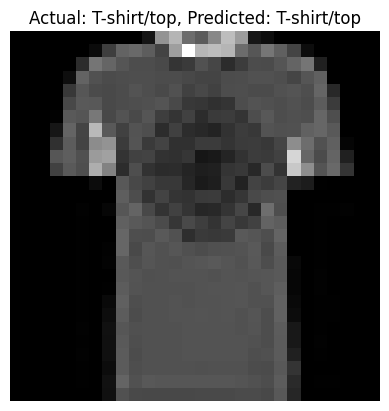

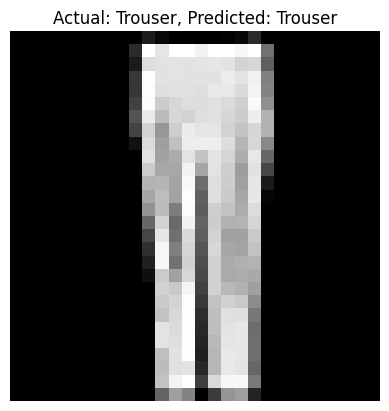

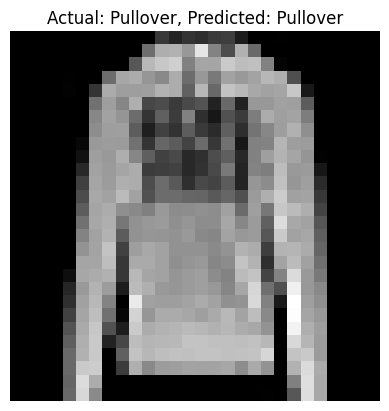

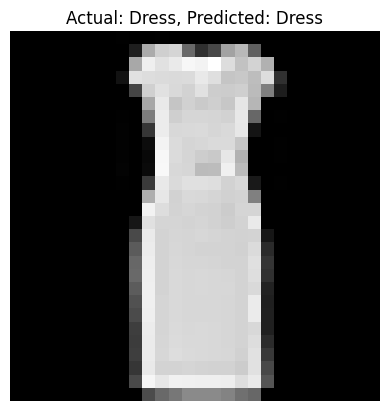

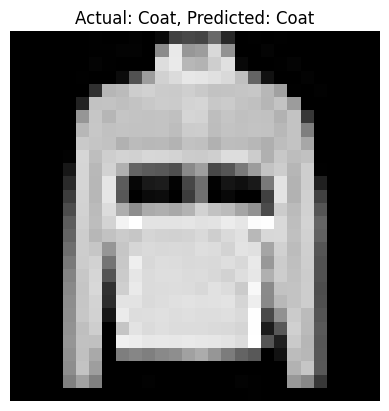

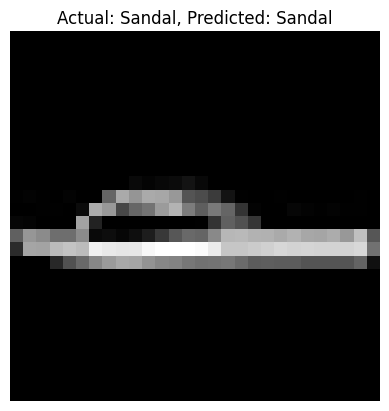

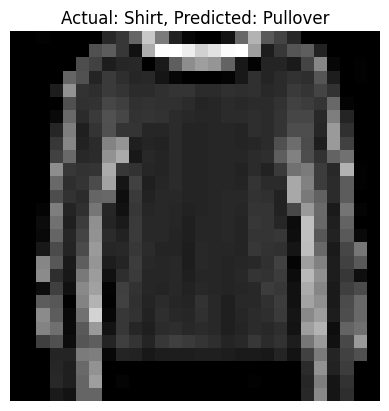

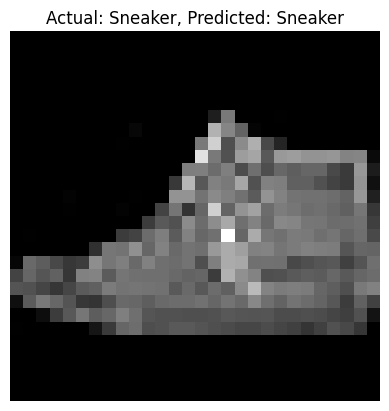

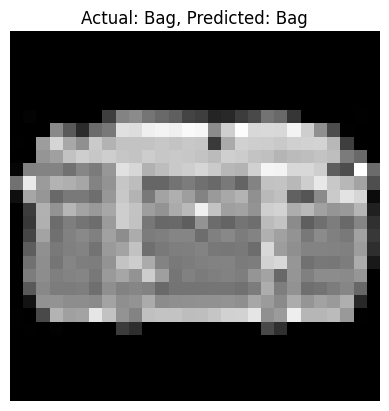

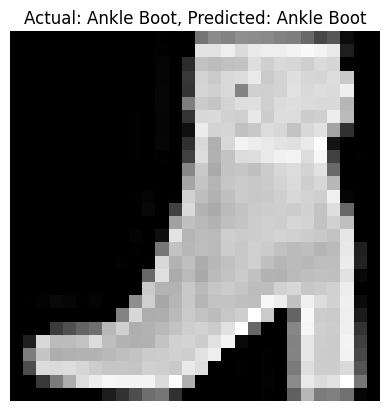

In [76]:
def visualize_predictions(model,p, dataloader):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

    with torch.no_grad():
        for i in range(10):  # Iterate over each class
            for images, labels in dataloader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images,p)
                predicted_labels = outputs.argmax(dim=1)

                idx = (labels == i).nonzero(as_tuple=True)[0]
                if len(idx) > 0:
                    image = images[idx[0]].cpu().numpy()
                    actual_label = labels[idx[0]].item()
                    predicted_label = predicted_labels[idx[0]].item()

                    plt.figure()
                    plt.imshow(image.squeeze(), cmap='gray')
                    plt.title(f'Actual: {class_names[actual_label]}, Predicted: {class_names[predicted_label]}')
                    plt.axis('off')
                    plt.show()
                    break  # Show only one image per class

visualize_predictions(model,parameters, test_loader)